In [1]:
import pandas as pd
weather = pd.read_csv("weather_dataset.csv", index_col="date_time")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
weather

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
01-01-2009 00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
01-01-2009 01:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
01-01-2009 02:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
01-01-2009 03:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
01-01-2009 04:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01-01-2020 19:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,13,21,53,61,0.0,1019,13,8,74,11
01-01-2020 20:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,12,22,39,61,0.0,1020,13,9,81,11
01-01-2020 21:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,12,23,25,62,0.0,1020,13,10,88,11


In [2]:
weather.apply(pd.isnull).sum()/weather.shape[0]

maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
dtype: float64

In [3]:
core_weather = weather[["maxtempC","mintempC","cloudcover","humidity","tempC","sunHour","precipMM","pressure","windspeedKmph"]].copy()

In [4]:
core_weather.columns=["max_temp","min_temp","cloud_cover","humidity","temperature","sun_hour","precip_mm","pressure","windspeed_kmph"]  

In [5]:
core_weather

,max_temp,min_temp,cloud_cover,humidity,temperature,sun_hour,precip_mm,pressure,windspeed_kmph
date_time,,,,,,,,,
01-01-2009 00:00,24,10,17,50,11,8.7,0.0,1015,10
01-01-2009 01:00,24,10,11,52,11,8.7,0.0,1015,11
01-01-2009 02:00,24,10,6,55,11,8.7,0.0,1015,11
01-01-2009 03:00,24,10,0,57,10,8.7,0.0,1015,12
01-01-2009 04:00,24,10,0,54,11,8.7,0.0,1016,11
...,...,...,...,...,...,...,...,...,...
01-01-2020 19:00,15,11,53,61,13,7.1,0.0,1019,11
01-01-2020 20:00,15,11,39,61,13,7.1,0.0,1020,11
01-01-2020 21:00,15,11,25,62,13,7.1,0.0,1020,11


In [6]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

max_temp          0.0
min_temp          0.0
cloud_cover       0.0
humidity          0.0
temperature       0.0
sun_hour          0.0
precip_mm         0.0
pressure          0.0
windspeed_kmph    0.0
dtype: float64

In [7]:
core_weather["max_temp"].value_counts()

max_temp
34    5976
35    5928
36    5520
33    5088
32    4968
31    4608
37    4440
30    3912
38    3624
26    3528
43    3456
27    3336
28    3264
25    3264
29    3216
41    3120
23    3024
42    2976
24    2904
22    2784
39    2784
40    2688
44    2544
45    2352
21    2112
46    1920
47     936
20     672
19     552
48     480
49     168
18     144
17      48
16      24
50      24
51      24
15      24
Name: count, dtype: int64

In [8]:
core_weather["min_temp"].value_counts()

min_temp
26    7440
27    6576
28    5664
29    5448
25    4224
31    3720
30    3600
16    3480
24    3456
12    3408
15    3384
13    3216
17    3120
14    3048
22    2976
11    2928
32    2928
21    2904
18    2880
33    2856
23    2712
10    2520
20    2400
19    2376
34    2136
9     1704
8     1608
35    1248
7      720
36     696
6      384
37     312
5      168
38      72
4       48
39      48
3       24
Name: count, dtype: int64

In [9]:
core_weather["cloud_cover"].value_counts()

cloud_cover
0     29533
3      4384
4      4004
2      3991
1      3468
      ...  
92       74
91       70
98       67
97       66
99       55
Name: count, Length: 101, dtype: int64

In [10]:
core_weather["humidity"].value_counts()

humidity
39     1632
32     1619
36     1591
33     1578
30     1572
       ... 
98       76
99       20
3        16
100       7
2         2
Name: count, Length: 99, dtype: int64

In [11]:
core_weather["temperature"].value_counts()

temperature
29    4858
30    4733
28    4664
27    4537
31    4509
32    4227
33    4102
26    3900
34    3822
35    3571
25    3237
36    2952
24    2925
23    2870
22    2772
21    2685
19    2619
20    2587
37    2521
18    2483
17    2420
16    2363
15    2149
38    2112
14    1942
39    1850
13    1708
40    1652
41    1455
12    1335
42    1266
11    1025
43     998
44     738
10     705
45     574
9      510
46     332
8      271
47     174
7      125
6       52
48      51
5       17
49      13
0       13
4        4
3        2
50       2
Name: count, dtype: int64

In [12]:
core_weather["sun_hour"].value_counts()

sun_hour
8.7     33864
11.6    11904
13.9     6264
13.3     5328
13.2     3744
13.4     3552
13.0     3168
13.1     3096
12.9     3000
12.8     2952
12.7     2760
13.8     1536
12.6     1440
12.5     1224
12.0     1008
11.9      984
7.2       936
12.1      696
11.0      672
12.4      648
12.2      552
10.7      528
10.2      504
9.8       480
13.7      480
10.5      408
7.1       408
11.5      312
9.5       288
10.6      288
10.8      288
12.3      264
8.1       240
5.6       240
9.4       216
5.8       216
10.9      216
11.8      192
8.2       168
4.1       144
9.3       144
4.3       120
7.8       120
9.2       120
7.9       120
10.1       96
8.6        96
9.1        96
4.0        72
8.8        48
8.3        48
9.7        24
5.9        24
5.7        24
4.2        24
7.3        24
6.0        24
Name: count, dtype: int64

In [13]:
core_weather["precip_mm"].value_counts()


precip_mm
0.0     91978
0.1      1078
0.2       581
0.3       414
0.4       335
        ...  
9.8         1
6.8         1
6.5         1
11.5        1
10.8        1
Name: count, Length: 83, dtype: int64

In [14]:
core_weather["precip_mm"] = core_weather["precip_mm"].fillna(0)

In [15]:
core_weather["pressure"].value_counts()

pressure
1013    4957
1014    4933
1015    4521
999     4455
1000    4441
1012    4323
1001    4240
998     4226
997     4081
1016    4042
1011    3963
1002    3827
996     3610
1003    3544
1010    3418
1004    3291
1005    3126
1009    3103
1007    3082
1017    3053
1006    2986
1008    2949
995     2911
1018    2163
994     1864
1019    1376
993     1204
1020     867
992      688
1021     418
991      349
990      167
1022     125
989       56
1023      36
988       26
987        6
1024       3
986        2
Name: count, dtype: int64

In [16]:
core_weather["windspeed_kmph"].value_counts()

windspeed_kmph
9     9488
8     8835
6     8125
10    8086
7     7384
12    6871
11    6612
5     6527
4     5252
13    4910
3     3852
14    3829
15    3355
16    2116
17    1910
2     1725
18    1593
19    1174
21     839
20     834
1      747
22     579
23     413
24     344
25     245
26     214
27     161
28      99
29      77
30      56
0       55
31      40
32      30
33      20
34       9
35       9
36       5
38       2
41       2
37       2
39       2
43       1
45       1
47       1
42       1
Name: count, dtype: int64

In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

max_temp          0.0
min_temp          0.0
cloud_cover       0.0
humidity          0.0
temperature       0.0
sun_hour          0.0
precip_mm         0.0
pressure          0.0
windspeed_kmph    0.0
dtype: float64

In [18]:
core_weather.dtypes

max_temp            int64
min_temp            int64
cloud_cover         int64
humidity            int64
temperature         int64
sun_hour          float64
precip_mm         float64
pressure            int64
windspeed_kmph      int64
dtype: object

In [19]:
core_weather.index

Index(['01-01-2009 00:00', '01-01-2009 01:00', '01-01-2009 02:00',
       '01-01-2009 03:00', '01-01-2009 04:00', '01-01-2009 05:00',
       '01-01-2009 06:00', '01-01-2009 07:00', '01-01-2009 08:00',
       '01-01-2009 09:00',
       ...
       '01-01-2020 14:00', '01-01-2020 15:00', '01-01-2020 16:00',
       '01-01-2020 17:00', '01-01-2020 18:00', '01-01-2020 19:00',
       '01-01-2020 20:00', '01-01-2020 21:00', '01-01-2020 22:00',
       '01-01-2020 23:00'],
      dtype='object', name='date_time', length=96432)

<Axes: xlabel='date_time'>

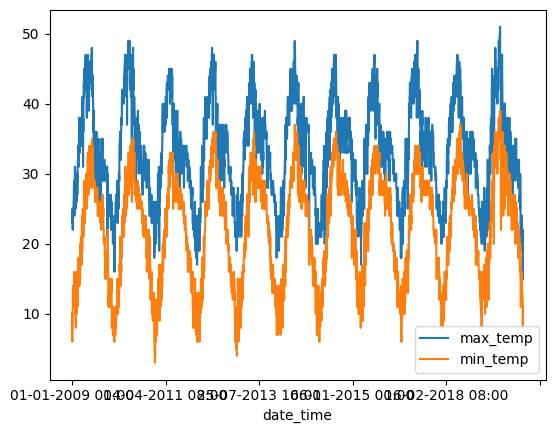

In [20]:
core_weather[["max_temp","min_temp"]].plot()

In [21]:
core_weather["humidity"]

date_time
01-01-2009 00:00    50
01-01-2009 01:00    52
01-01-2009 02:00    55
01-01-2009 03:00    57
01-01-2009 04:00    54
                    ..
01-01-2020 19:00    61
01-01-2020 20:00    61
01-01-2020 21:00    62
01-01-2020 22:00    63
01-01-2020 23:00    64
Name: humidity, Length: 96432, dtype: int64

<Axes: xlabel='date_time'>

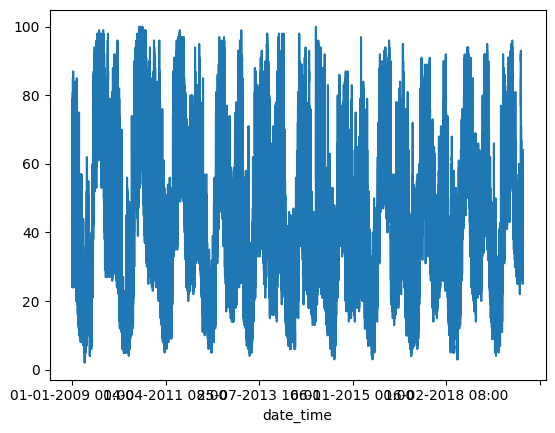

In [22]:
core_weather["humidity"].plot()

In [23]:
max_temp2d = weather['maxtempC'].values.reshape(-1,1)

In [24]:
core_weather["target"] = core_weather.shift(-1)["max_temp"]

In [25]:
core_weather = core_weather.iloc[:-1,:].copy()

In [26]:
core_weather

,max_temp,min_temp,cloud_cover,humidity,temperature,sun_hour,precip_mm,pressure,windspeed_kmph,target
date_time,,,,,,,,,,
01-01-2009 00:00,24,10,17,50,11,8.7,0.0,1015,10,24.0
01-01-2009 01:00,24,10,11,52,11,8.7,0.0,1015,11,24.0
01-01-2009 02:00,24,10,6,55,11,8.7,0.0,1015,11,24.0
01-01-2009 03:00,24,10,0,57,10,8.7,0.0,1015,12,24.0
01-01-2009 04:00,24,10,0,54,11,8.7,0.0,1016,11,24.0
...,...,...,...,...,...,...,...,...,...,...
01-01-2020 18:00,15,11,68,60,14,7.1,0.0,1019,11,15.0
01-01-2020 19:00,15,11,53,61,13,7.1,0.0,1019,11,15.0
01-01-2020 20:00,15,11,39,61,13,7.1,0.0,1020,11,15.0


In [27]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [28]:
predictors = ["humidity","max_temp","min_temp"]

In [29]:
train = core_weather.loc[:"31-12-2015 00:00"]

In [30]:
test = core_weather.loc["01-01-2016 01:00":]

In [31]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [32]:
predictions = reg.predict(test[predictors])

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(test["target"], predictions)

0.06568440365887854

In [35]:
combined=pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual", "predictions"]

In [36]:
combined

,actual,predictions
date_time,,
01-01-2016 01:00,26.0,26.008716
01-01-2016 02:00,26.0,26.008005
01-01-2016 03:00,26.0,26.007295
01-01-2016 04:00,26.0,26.009427
01-01-2016 05:00,26.0,26.011558
...,...,...
01-01-2020 18:00,15.0,15.063906
01-01-2020 19:00,15.0,15.063196
01-01-2020 20:00,15.0,15.063196


<Axes: xlabel='date_time'>

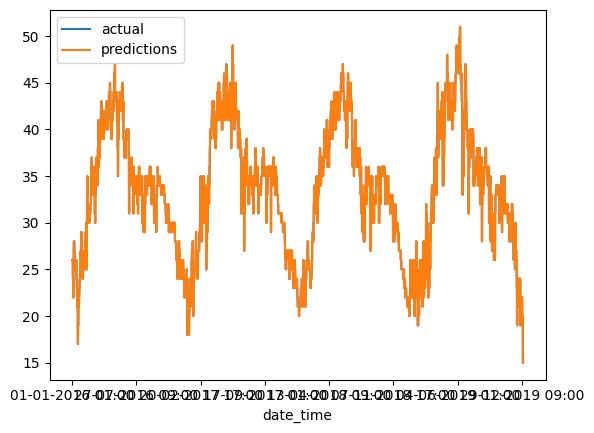

In [37]:
combined.plot()

In [38]:
reg.coef_

array([-7.10615888e-04,  9.93526858e-01,  4.09867542e-03])

In [39]:
def create_predictions(predictors,core_weather, reg):
    train= core_weather.loc[:"31-12-2015 23:00"]
    test= core_weather.loc["01-01-2016 00:00":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error= mean_absolute_error(test["target"], predictions)
    combined=pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "predictions"]
    return error, combined

In [40]:
core_weather["day_max"]=core_weather["max_temp"].rolling(24).mean()

In [41]:
core_weather

,max_temp,min_temp,cloud_cover,humidity,temperature,sun_hour,precip_mm,pressure,windspeed_kmph,target,day_max
date_time,,,,,,,,,,,
01-01-2009 00:00,24,10,17,50,11,8.7,0.0,1015,10,24.0,NaN
01-01-2009 01:00,24,10,11,52,11,8.7,0.0,1015,11,24.0,NaN
01-01-2009 02:00,24,10,6,55,11,8.7,0.0,1015,11,24.0,NaN
01-01-2009 03:00,24,10,0,57,10,8.7,0.0,1015,12,24.0,NaN
01-01-2009 04:00,24,10,0,54,11,8.7,0.0,1016,11,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
01-01-2020 18:00,15,11,68,60,14,7.1,0.0,1019,11,15.0,16.041667
01-01-2020 19:00,15,11,53,61,13,7.1,0.0,1019,11,15.0,15.833333
01-01-2020 20:00,15,11,39,61,13,7.1,0.0,1020,11,15.0,15.625000


In [42]:
core_weather.corr()["target"]

max_temp          0.998526
min_temp          0.880645
cloud_cover       0.000649
humidity         -0.456796
temperature       0.864056
sun_hour          0.785367
precip_mm        -0.021839
pressure         -0.775444
windspeed_kmph    0.199184
target            1.000000
day_max           0.987396
Name: target, dtype: float64

In [43]:
combined["diff"] =(combined["actual"]- combined["predictions"]).abs()

In [44]:
combined.sort_values("diff",ascending=False).head()

,actual,predictions,diff
date_time,,,
15-04-2019 23:00,34.0,43.994235,9.994235
10-07-2017 23:00,27.0,36.974831,9.974831
18-06-2019 23:00,33.0,41.993515,8.993515
20-08-2019 23:00,28.0,36.988167,8.988167
09-03-2017 23:00,25.0,32.995813,7.995813
